# Zadanie: kupujemy mieszkanie

In [38]:
import numpy as np

freq = 12
years = 5
start_price = 120000
price_increase = 0.05
depo_rate = 0.12
depo_pay = 1980

price_increase /= freq # konwersja przyrostu ceny do okresu miesięcznego
depo_rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

## Wyznaczenie wektorów dla okresów wzrostu ceny mieszkania i wartości lokaty

In [41]:
periods = np.arange(1, nper+1, dtype=int)

## Obliczenie wektora zmian ceny mieszkania

In [62]:
import numpy_financial as npf
flat_price_incr = -np.around(npf.fv(price_increase, periods, nper, start_price), 2)
flat_price_incr[[0,1,2, 11, -3,-2,-1]]

array([120560.  , 121122.33, 121687.01, 126876.16, 156654.98, 157367.71,
       158083.41])

## Po pięciu latach mieszkanie osiągnie wartość 158083.41 zł.

## Obliczenie wektora wpłat na lokatę

In [46]:
payments = periods + depo_pay
payments[-10:]

array([2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040])

Utworzyłem wektor *periods* tak jak w materiałach z kursu. Korzystając z niego w wektorze wpłat nie mam stałych wartości, a funkcja fv wylicza wartość o ok. 5000 wyższą niż ta, którą wyliczylem ręcznie na kalkulatorze. Po 12 miesiącach mieszkanie powinno być warte 126000.

In [48]:
balance = np.zeros(nper) 
balance_close = -np.around(balance - np.cumsum(payments), 2)
balance_close[[0,1,2,-3,-2,-1]]

array([  1981.,   3963.,   5946., 116551., 118590., 120630.])

In [50]:
balance_open = balance_close + payments

## Obliczenie wektora wielkości odsetek z lokaty

In [52]:
depo_interest = np.around(balance_open * depo_rate, 2)
depo_interest[:10]

array([ 39.62,  59.45,  79.29,  99.14, 119.  , 138.87, 158.75, 178.64,
       198.54, 218.45])

## Zsumowanie wpłat i odsetek z lokaty

In [80]:
depo_value = payments + depo_interest
np.around(depo_value.sum(), 2)

158448.5

## Aby uzbierać na mieszkanie należy wpłacać 1980 zł miesięcznie przez 5 lat.

Nie wiedziałem jak mam te funkcje przekształcić zeby wyznaczyć wartość miesięcznych wpłat. Stopniowo zwiększałem wpłaty aż suma z lokaty przewyższyła wartość mieszkania.

Text(0, 0.5, 'Wartość')

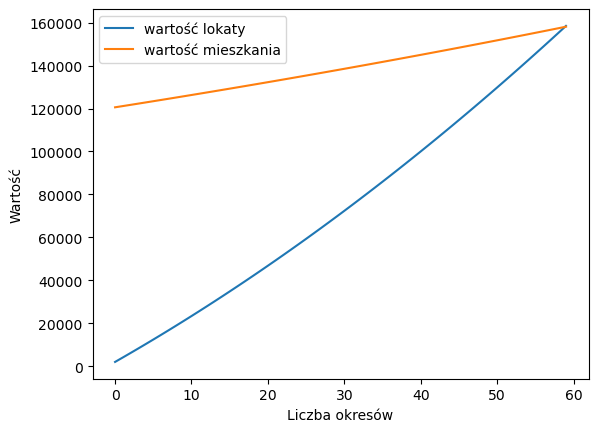

In [84]:
import matplotlib.pyplot as plt

plt.plot(depo_value.cumsum(), label='wartość lokaty')
plt.plot(flat_price_incr ,label='wartość mieszkania')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Wartość')